# Problem Statement 5:

In [3]:
# Load the dataset from the provided file path
import pandas as pd  # Import pandas library to work with datasets
file_path = "C:\\Users\\akans\\OneDrive\\Desktop\\SEM_4\\TERM_9\\INTERN\\YEAR-2_PHASE-2\\CAPSTONE_PROJ\\new_sports.csv"  # Path to the dataset file
new_sports = pd.read_csv(file_path)  # Read the dataset into a DataFrame
# Display the first few rows of the dataset to see what it looks like
print(new_sports.head())
# Print some basic information about the dataset, like how many rows and columns it has
print(new_sports.info())

   SerialID  Unnamed: 0    Player    Team  Age      Height     Weight  \
0         1           0  Player C  Team C   31  164.238236  64.899554   
1         2           1  Player D  Team C   22  164.489643  55.636159   
2         3           2  Player A  Team C   27  188.851650  89.325850   
3         4           3  Player C  Team C   29  184.567349  50.952308   
4         5           4  Player C  Team C   27  192.172813  78.832881   

   Position  Goals  Assists  ...  TacklesWon  CleanSheets  PlayerFatigue  \
0  Defender   11.0      2.0  ...          22            6       0.374540   
1  Defender    2.0     16.0  ...          27            6       0.950714   
2  Defender    0.0     13.0  ...          23            5       0.731994   
3   Forward   13.0      1.0  ...           3            4       0.598658   
4  Defender    6.0      8.0  ...          12            8       0.156019   

   MatchPressure  InjuryHistory  TrainingHours  FatigueInjuryCorrelation  \
0             55            

# Drop Irrelevant Columns

In [7]:
# Get rid of columns that we don't need for our analysis, like ID numbers or player names
columns_to_drop = ['SerialID', 'Unnamed: 0', 'Player', 'Team', 'Season']  # List of columns to be dropped
new_sports = new_sports.drop(columns=columns_to_drop)  # Drop the specified columns


# Data Normalization

In [12]:
# Encode categorical columns using one-hot encoding
new_sports_encoded = pd.get_dummies(new_sports)

# Data normalization
scaler = StandardScaler()
new_sports_scaled = scaler.fit_transform(new_sports_encoded)

## Check the encoded DataFrame:

In [18]:
print(new_sports_encoded.head())


   Age      Height     Weight  Goals  Assists  YellowCards  RedCards  \
0   31  164.238236  64.899554   11.0      2.0            4         3   
1   22  164.489643  55.636159    2.0     16.0            8         2   
2   27  188.851650  89.325850    0.0     13.0            8         0   
3   29  184.567349  50.952308   13.0      1.0            3         3   
4   27  192.172813  78.832881    6.0      8.0            1         2   

   PassCompletionRate  DistanceCovered  Sprints  ...  MatchPressure  \
0           81.644912        10.883001       42  ...             55   
1           76.288018         5.650024       17  ...             96   
2           78.247265         9.236842        2  ...             36   
3           99.742740         8.523576       58  ...             37   
4           51.430636         7.239479       61  ...             14   

   InjuryHistory  TrainingHours  FatigueInjuryCorrelation  \
0              0      18.390595                  1.864902   
1              8  

## Check the scaled values:

In [20]:
print(new_sports_scaled)


[[ 0.38319467 -1.44039195 -1.1662838  ... -0.5817947  -0.59967285
  -0.55929057]
 [-1.04243239 -1.41986383 -1.66656029 ... -0.5817947  -0.59967285
  -0.55929057]
 [-0.25041736  0.56937084  0.15287636 ... -0.5817947  -0.59967285
  -0.55929057]
 ...
 [ 0.85840369  1.02086849 -0.15949259 ...  1.71881938 -0.59967285
  -0.55929057]
 [-1.51764141  0.22992732 -0.77773001 ... -0.5817947  -0.59967285
  -0.55929057]
 [-0.40882037  2.98774219 -0.43067477 ... -0.5817947   1.66757592
  -0.55929057]]


# Dimensionality Reduction using PCA

In [25]:
# Reduce the number of features in our dataset so we can visualize it more easily
# Imagine squishing our data down into a 2D graph so we can see the big picture
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
pca = PCA(n_components=2)  # Initialize PCA object to reduce dimensions to 2
new_sports_pca = pca.fit_transform(new_sports_scaled)  # Perform PCA on the normalized data


# To check if the code has worked:

In [32]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.06764174 0.05712927]


### Interpretation-
#### The first value, 0.06764174, indicates that the first principal component explains approximately 6.76% of the total variance in the dataset.
#### The second value, 0.05712927, indicates that the second principal component explains approximately 5.71% of the total variance in the dataset.
#### Together, these two principal components explain around 12.47% of the total variance in the dataset.

#### Comment-
#### The explained variance ratio helps us understand how much information each principal component retains from the original dataset.
#### In this case, the variance explained by each component is relatively low, suggesting that these principal components may not capture a significant amount of variation in the data.
#### Depending on our analysis goals and requirements, we may need to consider using more principal components to capture a higher proportion of the variance in the dataset.

# Visualization

#### In terms of PCA (Principal Component Analysis) in soccer, the completion rates and assists data could be subjected to dimensionality reduction to identify underlying patterns or relationships, potentially revealing key features influencing player performance.

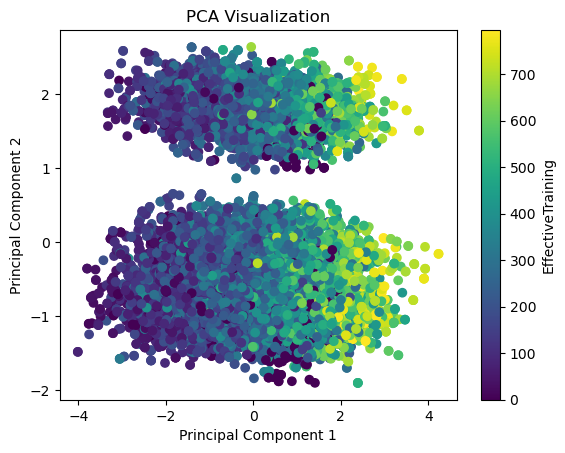

In [42]:
# Draw a graph to show our data in a simple way
# This helps us understand the patterns and relationships between different parts of the data
import matplotlib.pyplot as plt  # Import matplotlib for visualization
plt.scatter(new_sports_pca[:, 0], new_sports_pca[:, 1], c=y, cmap='viridis')  # Scatter plot of PCA components
plt.xlabel('Principal Component 1')  # X-axis label
plt.ylabel('Principal Component 2')  # Y-axis label
plt.title('PCA Visualization')  # Title of the plot
plt.colorbar(label='EffectiveTraining')  # Color bar legend for target variable
plt.show()  # Display the plot

# Analysis Output for Soccer-
## Completion rates refer to the percentage of successful passes made by a player during a game or over a specified period.
## Pass Completion Rate (X-axis)-
#### - Ranges from 50% to 110%, with completion rates exceeding 100% impossible in soccer. 
### - Possibilities-
#### 1. Data filtered to include exceptional performances.
#### 2. Data collection error resulting in inflated completion rates.

## Assists (Y-axis)-
### - Ranges from 0 to 17.5 assists per game.
### - Possibilities-
#### 1. Incorrect data.
#### 2. Cumulative assists over a short period presented as an average per game.

## Positive Correlation (with reservations):
##### Positive correlation (with reservations) suggests that while one variable's increase may correspond to an increase in another, there are uncertainties about this relationship.
#### - Potential positive correlation between pass completion rate and assists.
#### - Higher completion rates may lead to more assists.

# Feature Selection using SelectKBest

In [60]:
# Choose the most important features from our dataset
# We want to focus on the ones that have the biggest impact on our target variable
# Encode categorical columns using one-hot encoding
new_sports_encoded = pd.get_dummies(new_sports)

# Feature selection using SelectKBest
X = new_sports_encoded.drop(columns=['EffectiveTraining'])  # Features
y = new_sports_encoded['EffectiveTraining']  # Target variable
selector = SelectKBest(score_func=f_regression, k=5)  # Initialize SelectKBest object to select top 5 features
X_selected = selector.fit_transform(X, y)  # Select top 5 features
selected_feature_names = X.columns[selector.get_support()]  # Get the names of the selected features


# Feature Selection:
### Identifies crucial aspects of player performance impacting training effectiveness.
## One-Hot Encoding-
#### Transforms categorical variables into numerical format for analysis.
## SelectKBest Method-
#### Selects the top 5 features with the highest predictive power for training effectiveness.
#### Utilizes the F-regression score to measure feature-target relationship strength.
## Transformation:
#### Focuses analysis on the most influential player performance aspects by retaining only the selected features.

# Display Selected Features

In [64]:
# Show the names of the features that we selected as the most important
# These are the ones that will help us make the best predictions
print("Selected features:", selected_feature_names)

Selected features: Index(['Goals', 'Assists', 'DistanceCovered', 'PressurePerformanceImpact',
       'Position_Forward'],
      dtype='object')


# Selected features in soccer analysis:
#### - Goals- Fundamental indicator of a player's scoring ability, crucial for offensive contribution.
#### - Assists- Reflects the player's playmaking skills, indicating their ability to set up scoring opportunities for teammates.
#### - Distance Covered- Represents the player's work rate and involvement across the pitch, highlighting their endurance and contribution in both attacking and defensive phases.
#### - Pressure Performance Impact- Indicates how effectively the player handles pressure situations, such as maintaining possession or executing under defensive pressure.
#### - Position_Forward- Specifies the player's role within the team structure, emphasizing their primary responsibility in creating scoring chances and contributing to offensive plays.
## Conclusion:
#### The selected features offer a comprehensive assessment of a soccer player's performance, encompassing their scoring ability (Goals), playmaking skills (Assists), work rate and endurance (Distance Covered), ability to handle pressure situations (Pressure Performance Impact), and positional role within the team (Position: Forward). Together, these features provide valuable insights into various aspects of a player's contribution on the field.